In [8]:
from cellorganizer.tools import slml2report
import glob
import urllib.request
import tarfile 
import os
from IPython.core.display import display, HTML, Image

folder_name = 'Module4A'
model_name = 'golgi_model_vs_nuclear_model'
model_folder = "/home/murphylab/cellorganizer/local/models/"

topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + "/" + folder_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
os.system("ls")
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)
os.system("ls")
if not os.path.exists(model_name):
    os.makedirs(model_name)
os.chdir(model_name)
os.system("ls")

options = {}
options['verbose'] = 1
options['includenuclear'] = 0
options['includecell'] = 0
options['includeprot'] = 1
options['paired'] = 0



* Compare the golgi appratus model with the nucleoli model

In [9]:
model_files_1 = model_folder + 'golgi_GT_model_s.mat'
model_files_2 = model_folder + 'nucleoli_GT_model_s.mat'
os.system("ls")
answer = slml2report(model_files_1 , model_files_2, options)
HTML(filename =  'index.html')


CellOrganizer v2.10 (MATLAB RO2019a)


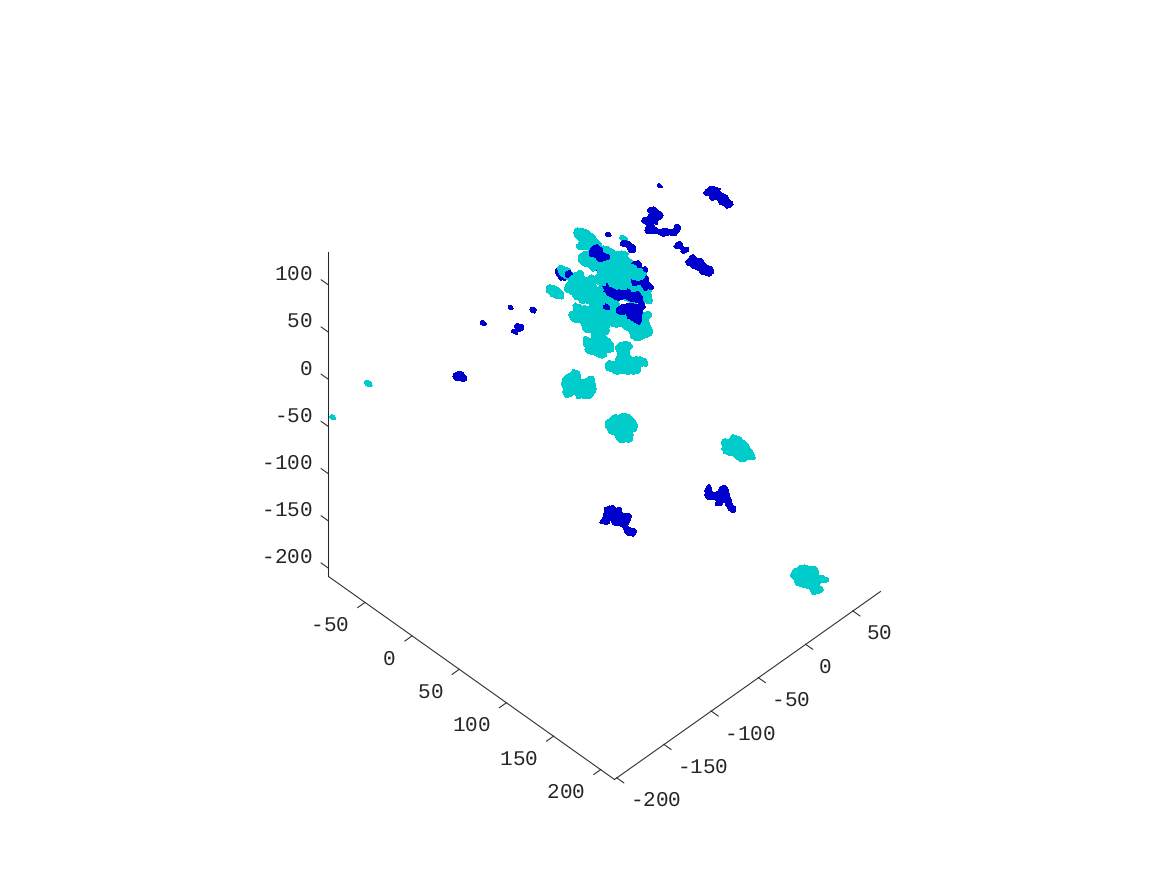

In [12]:
# visualize them

Image('show_shape_space_1.png')

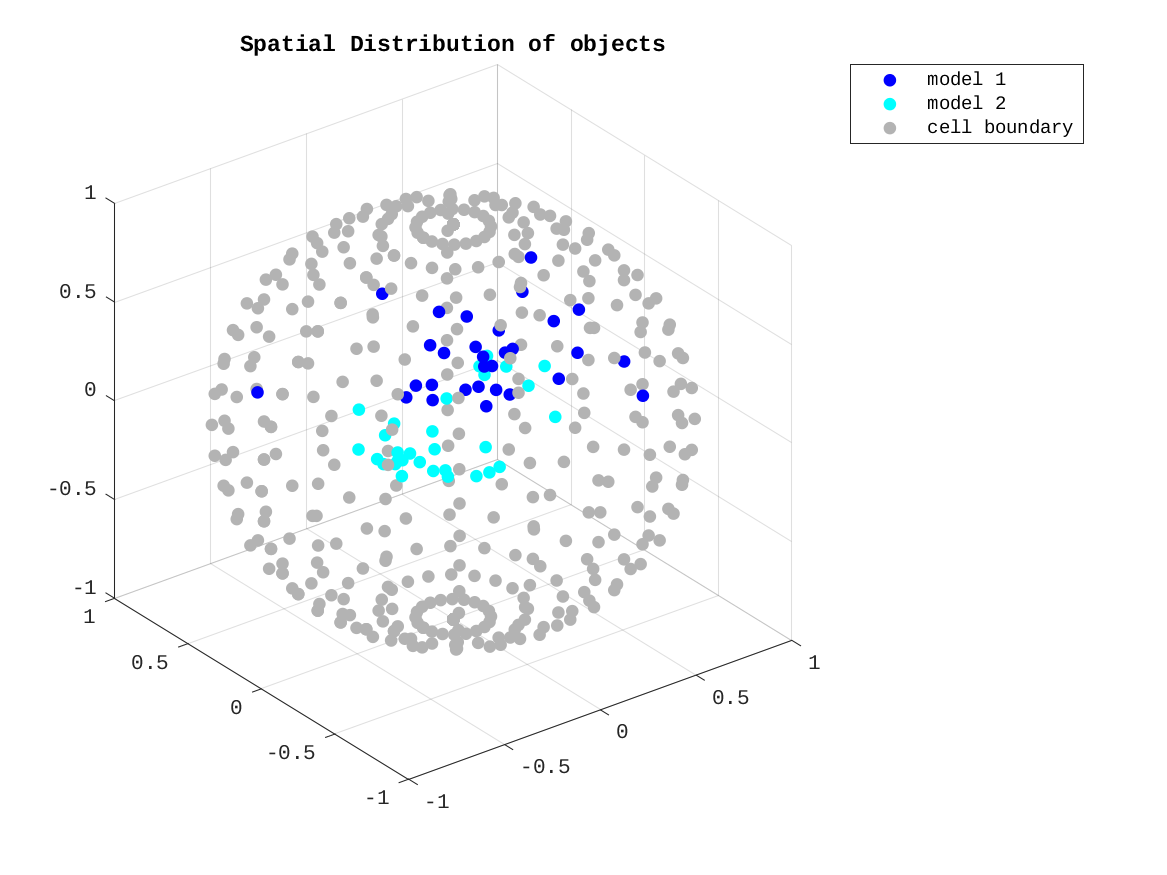

In [14]:
Image('show_spatial_distribution.png')

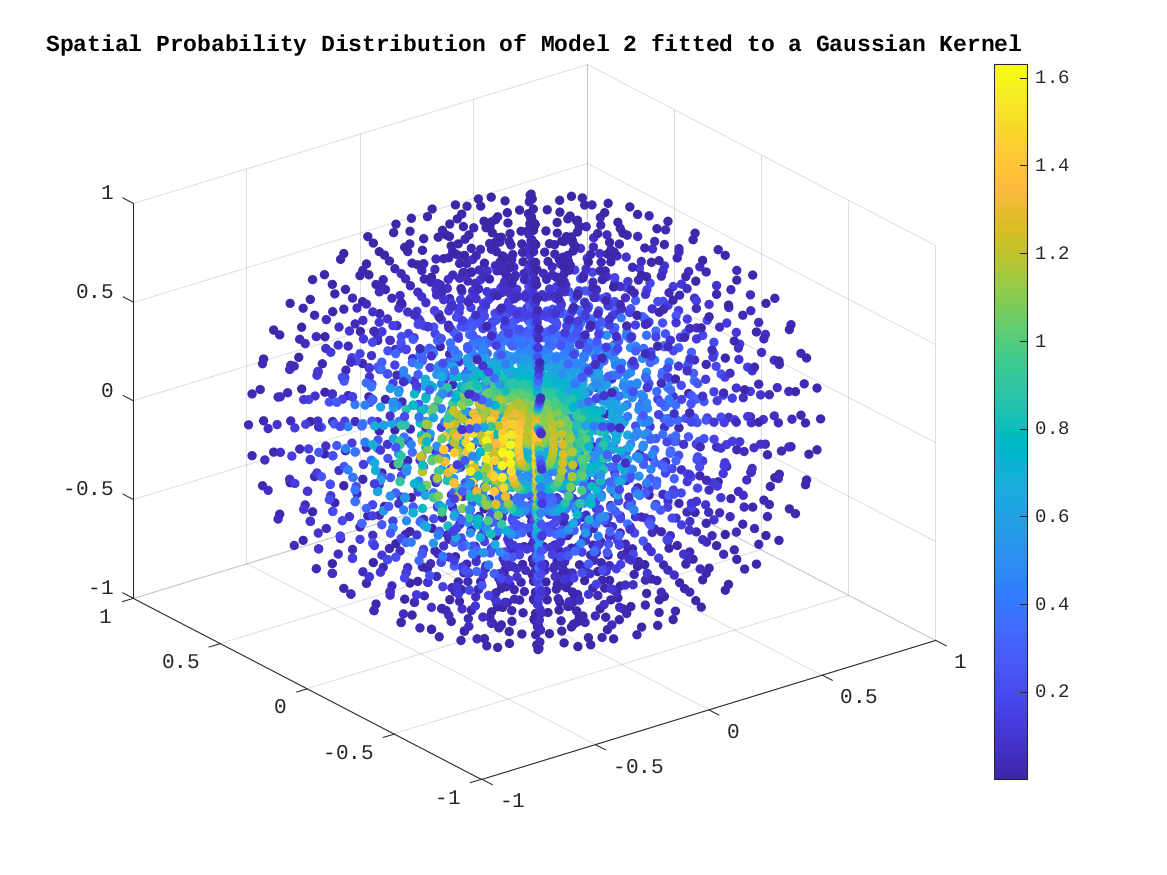

In [15]:
Image('spatial_model_fit.png')

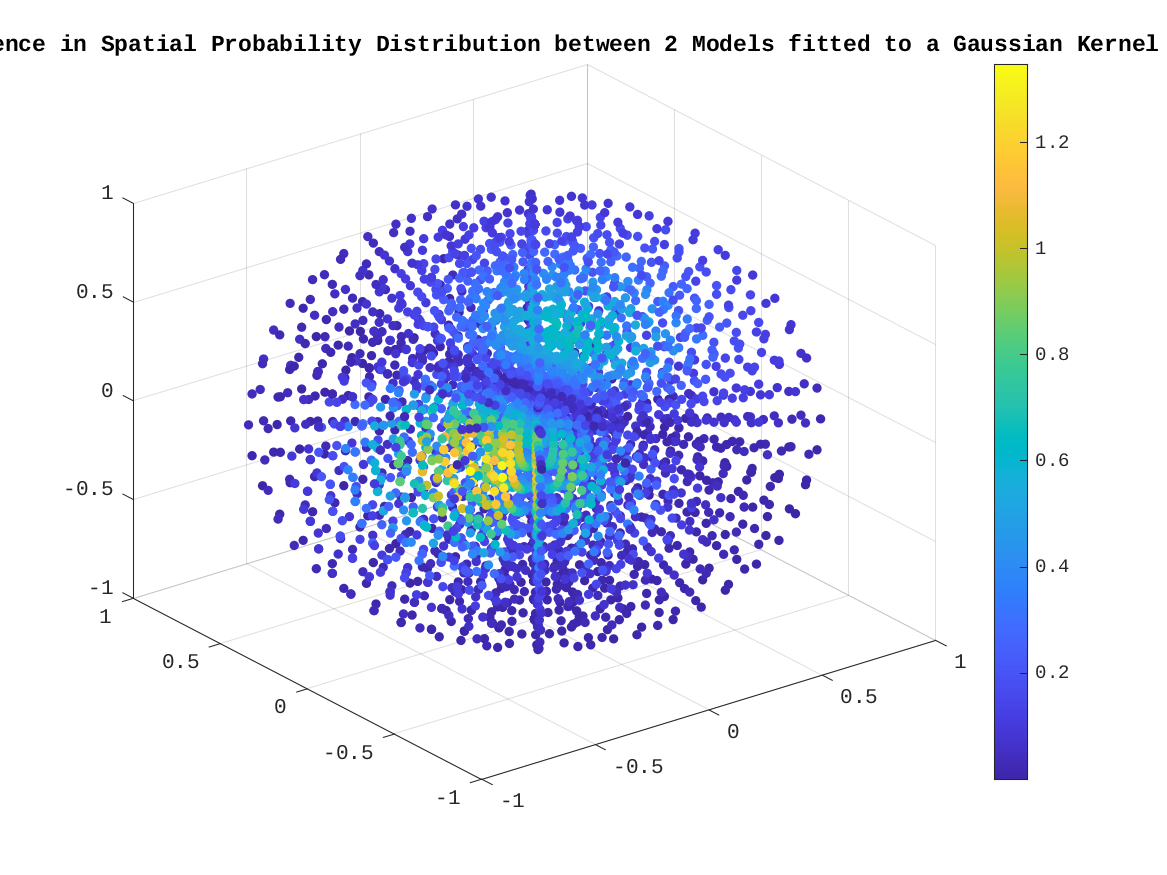

In [16]:
Image('spatial_model_diff.png')

* Compare the golgi appratus model with the desmosome model

In [17]:
model_name = 'golgi_model_vs_desmosome_model'


topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + "/" + folder_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
os.system("ls")
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)
os.system("ls")
if not os.path.exists(model_name):
    os.makedirs(model_name)
os.chdir(model_name)
os.system("ls")

model_files_1 = model_folder + 'golgi_GT_model_s.mat'
model_files_2 = model_folder + 'desmosome_GT_model_s.mat'
os.system("ls")
answer = slml2report(model_files_1 , model_files_2, options)
HTML(filename =  'index.html')



CellOrganizer v2.10 (MATLAB RO2019a)


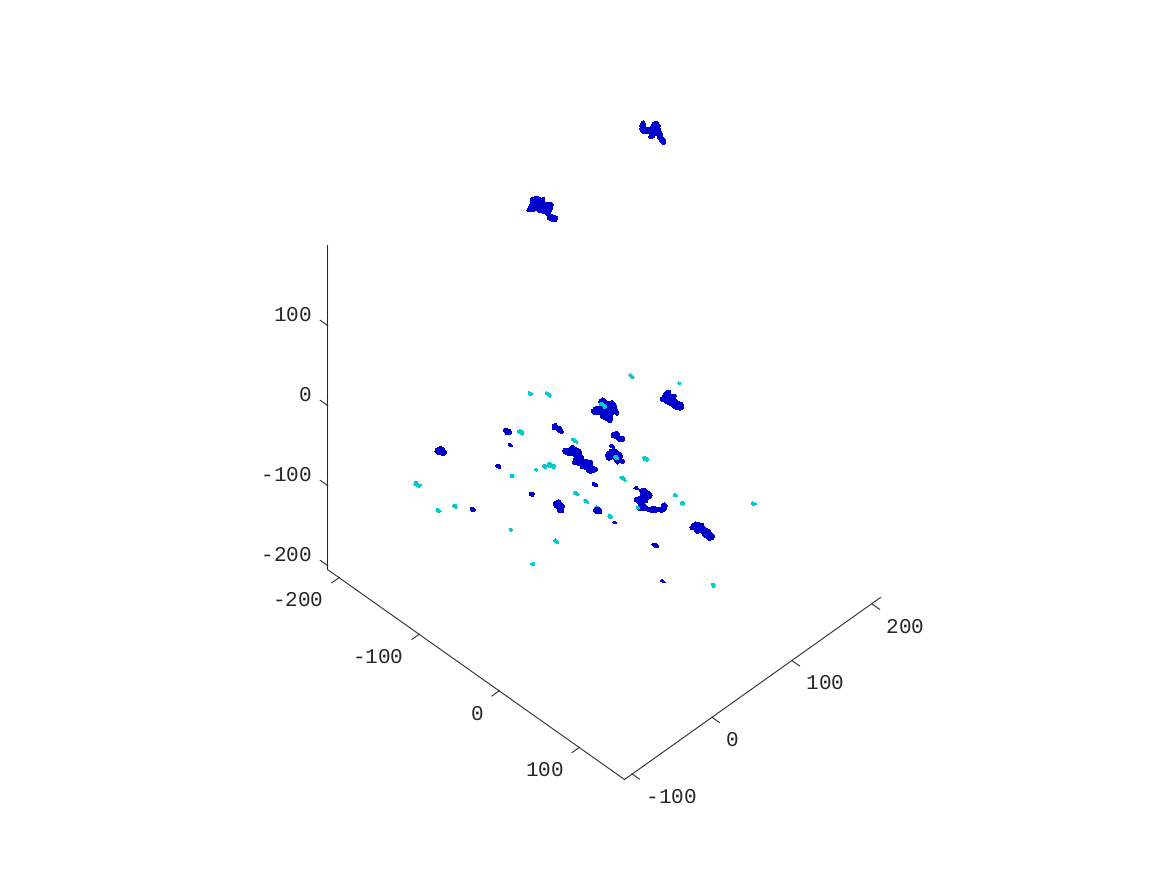

In [19]:
# visualize them

Image('show_shape_space_1.png')

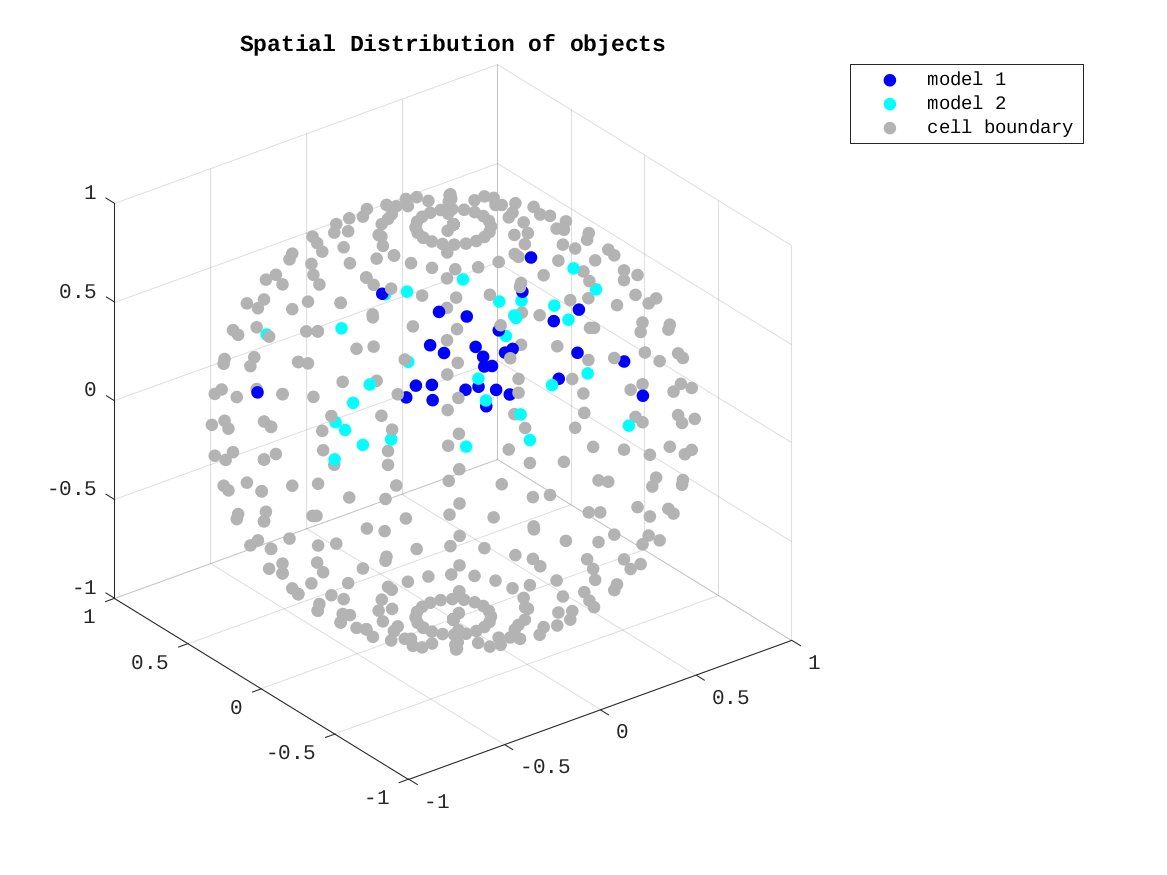

In [20]:
Image('show_spatial_distribution.png')

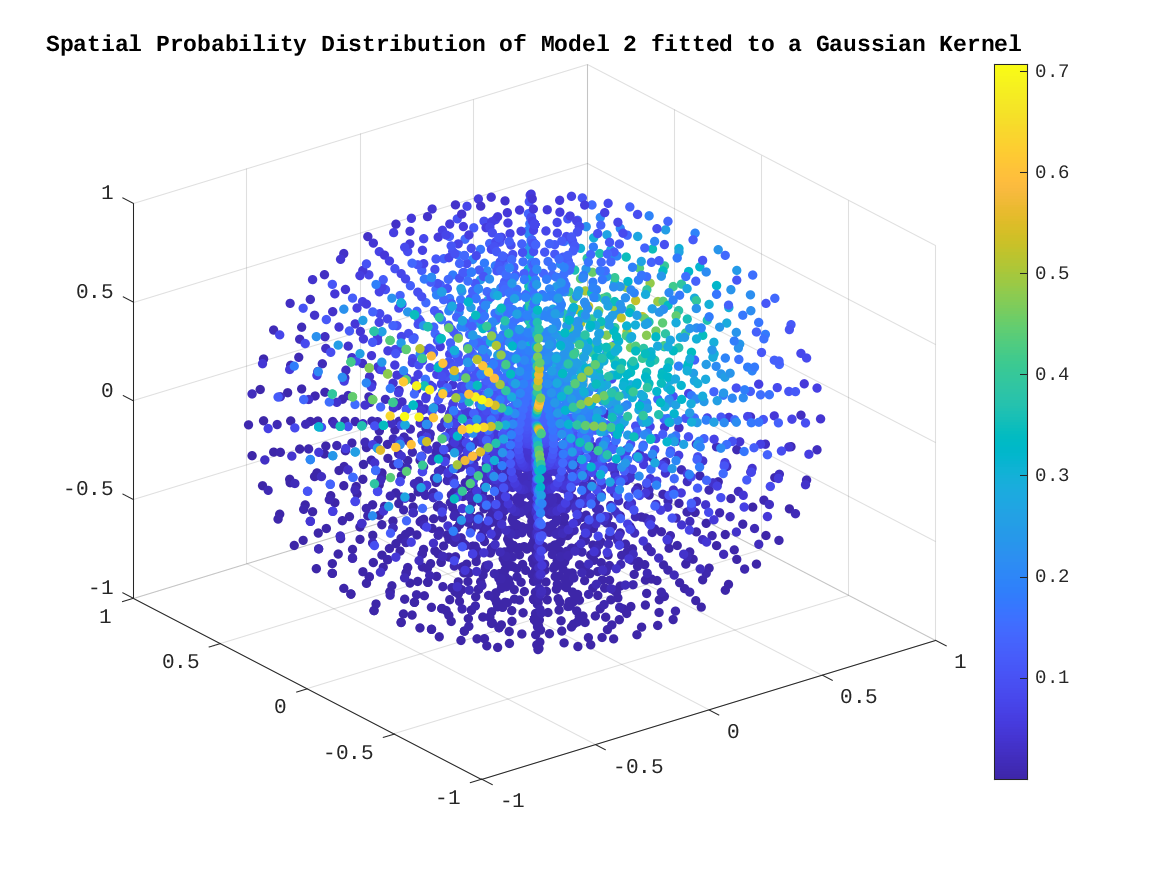

In [21]:
Image('spatial_model_fit.png')

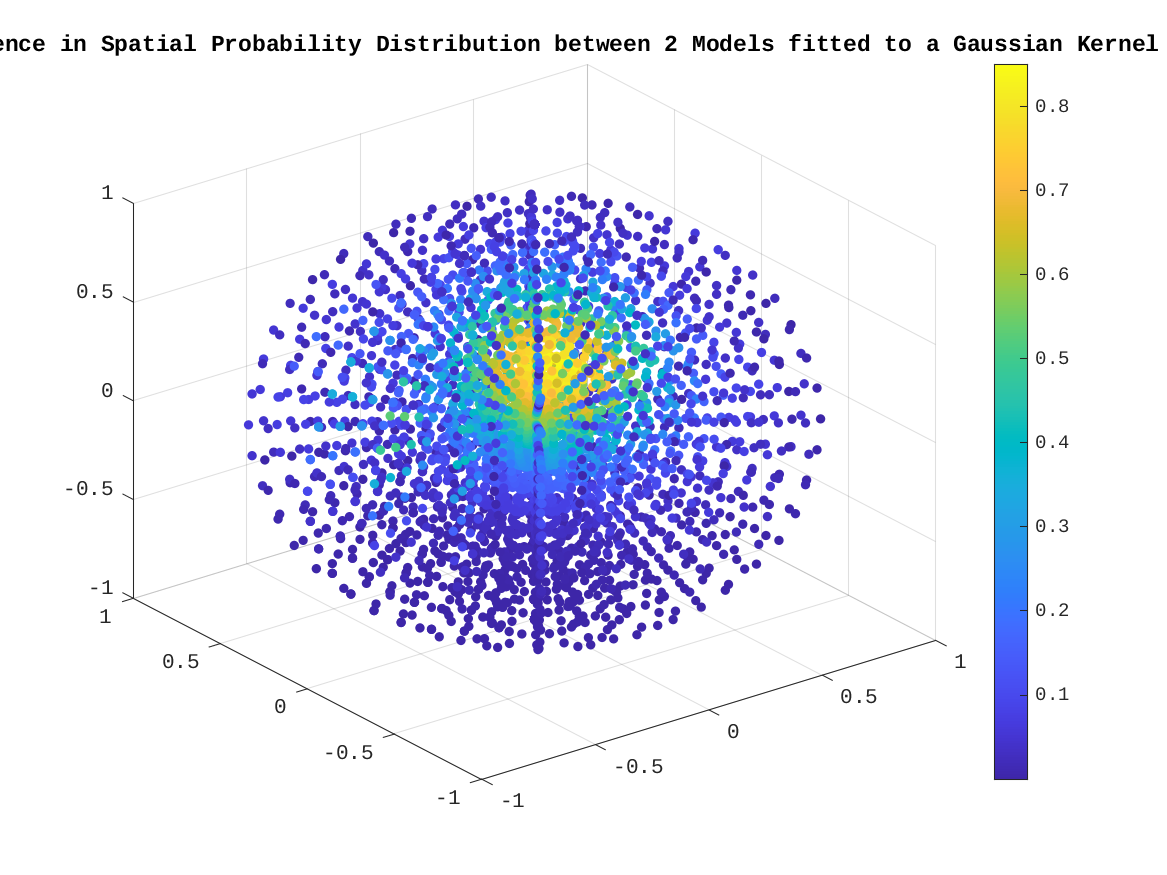

In [22]:
Image('spatial_model_diff.png')

* For more details, please refer to our [paper](https://www.biorxiv.org/content/10.1101/2022.05.24.493229v1.abstract).